In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

df = pd.read_csv('Diwali_Sales_Data.csv',encoding= 'unicode_escape')
df.head(3)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN


In [2]:
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount,Status,unnamed1
count,1.125100e+04,11251.000000,11251.000000,11251.000000,11239.000000,0.0,0.0
mean,1.003004e+06,35.421207,0.420318,2.489290,9453.610858,NaN,NaN
std,1.716125e+03,12.754122,0.493632,1.115047,5222.355869,NaN,NaN
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000,NaN,NaN
25%,1.001492e+06,27.000000,0.000000,1.500000,5443.000000,NaN,NaN
50%,1.003065e+06,33.000000,0.000000,2.000000,8109.000000,NaN,NaN
75%,1.004430e+06,43.000000,1.000000,3.000000,12675.000000,NaN,NaN
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [4]:
df.drop(['unnamed1', 'Status'], axis = 1, inplace =True)
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0


In [5]:
df['Occupation'].value_counts()

IT Sector          1588
Healthcare         1408
Aviation           1310
Banking            1139
Govt                854
Hospitality         705
Media               637
Automobile          566
Chemical            542
Lawyer              531
Retail              501
Food Processing     423
Construction        414
Textile             350
Agriculture         283
Name: Occupation, dtype: int64

In [6]:
df['Age Group'].value_counts()

26-35    4543
36-45    2286
18-25    1879
46-50     987
51-55     832
55+       428
0-17      296
Name: Age Group, dtype: int64

In [7]:
df.isnull().sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [8]:
# Duplicate Values
df['User_ID'].value_counts()

1001680    24
1003808    23
1001941    22
1004425    20
1004682    19
           ..
1003671     1
1005399     1
1004572     1
1000396     1
1005258     1
Name: User_ID, Length: 3755, dtype: int64

In [11]:
# Changing data type of column
df['Amount'] = df['Amount'].astype('int')
df['Amount'].dtypes

dtype('int32')

In [12]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [15]:
# Renaming a column
df.rename(columns = {'Marital_Status': 'Married'},inplace =True)
df.describe().T

,count,mean,std,min,25%,50%,75%,max
User_ID,11239.0,1.003004e+06,1716.038826,1000001.0,1001491.5,1003064.0,1004426.5,1006040.0
Age,11239.0,3.541036e+01,12.753866,12.0,27.0,33.0,43.0,92.0
Married,11239.0,4.200552e-01,0.493589,0.0,0.0,0.0,1.0,1.0
Orders,11239.0,2.489634e+00,1.114967,1.0,2.0,2.0,3.0,4.0
Amount,11239.0,9.453611e+03,5222.355168,188.0,5443.0,8109.0,12675.0,23952.0


Exploratory Data Analysis

<AxesSubplot:xlabel='Gender', ylabel='count'>

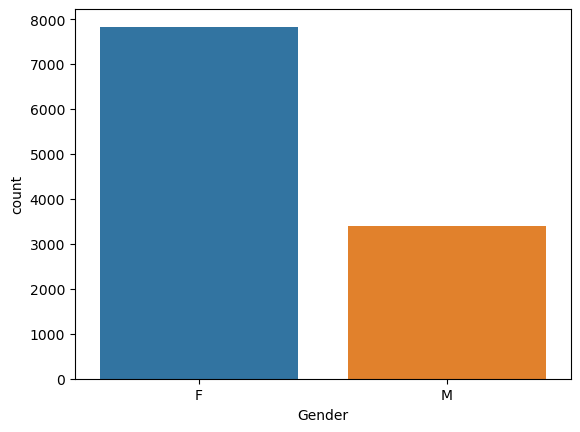

In [16]:
# Count plot on gender column
sns.countplot(x = 'Gender', data = df)

In [25]:
df2 = df.groupby(['Gender'],as_index = False)['Amount'].sum().sort_values( by=['Amount'],ascending = False)

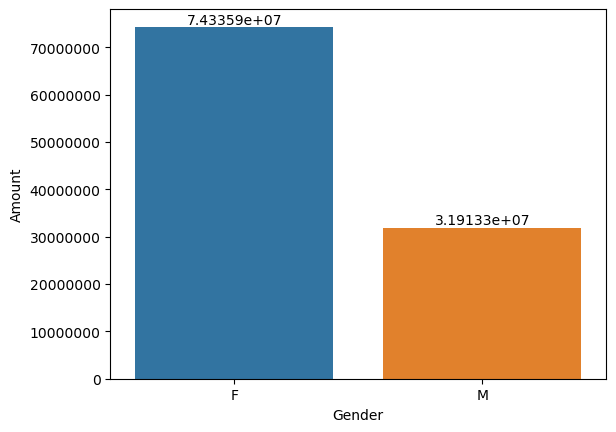

In [40]:
ax = sns.barplot(data= df2, x ='Gender', y='Amount')
plt.ticklabel_format(style='plain', axis='y')
for bars in ax.containers:
    ax.bar_label(bars)
    
    


 From above two graphs we can see that Females spent more than double as males

In [46]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Married', 'State', 'Zone', 'Occupation', 'Product_Category', 'Orders',
       'Amount'],
      dtype='object')

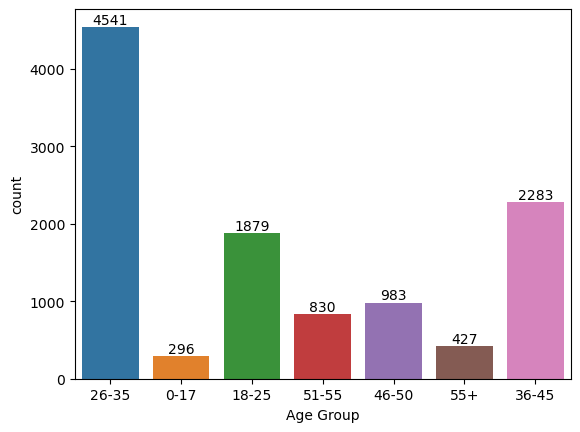

In [49]:
ax = sns.countplot(data = df,x='Age Group')
for bars in ax.containers:
    ax.bar_label(bars)

In [50]:

age_amount = df['Age Group'].value_counts(ascending =  False).values
age_amount

array([4541, 2283, 1879,  983,  830,  427,  296], dtype=int64)

[Text(0, 0, '4541'),
 Text(0, 0, '2283'),
 Text(0, 0, '1879'),
 Text(0, 0, '983'),
 Text(0, 0, '830'),
 Text(0, 0, '427'),
 Text(0, 0, '296')]

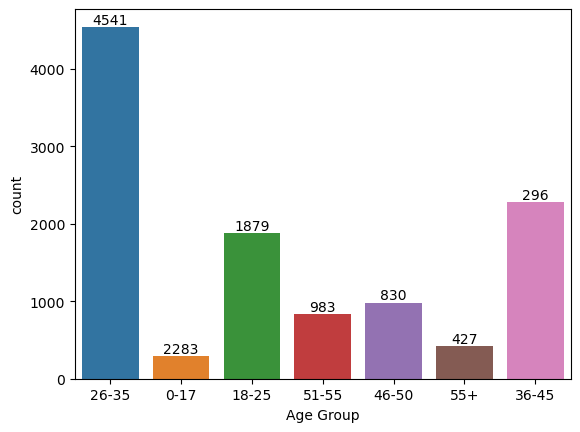

In [52]:
ax = sns.countplot(data = df,x='Age Group')
ax.bar_label(container= ax.containers[0], labels = age_amount)

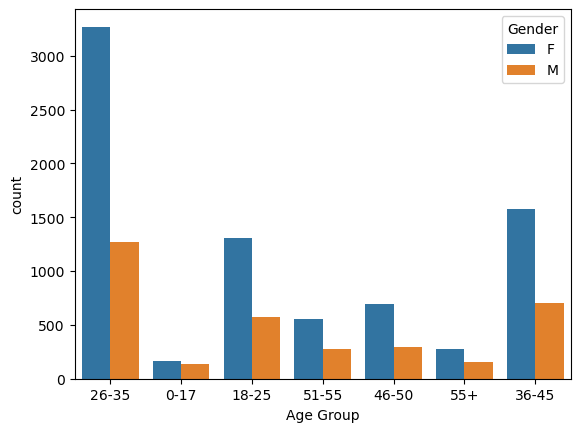

In [54]:
# Firter dividing based on gender

ax = sns.countplot(data = df,x='Age Group', hue='Gender')

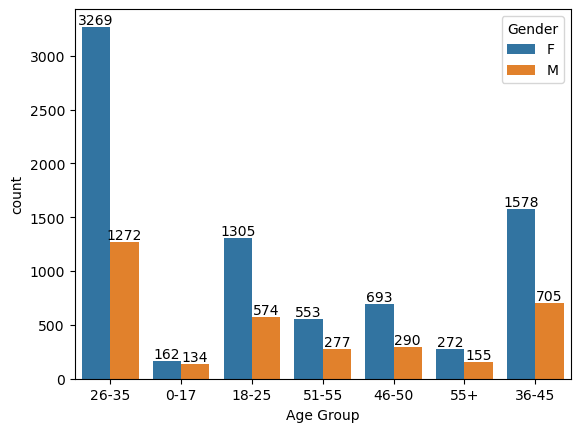

In [55]:
ax = sns.countplot(data = df,x='Age Group', hue='Gender')
for bars in ax.containers:
    ax.bar_label(bars)

<AxesSubplot:xlabel='Age Group', ylabel='Amount'>

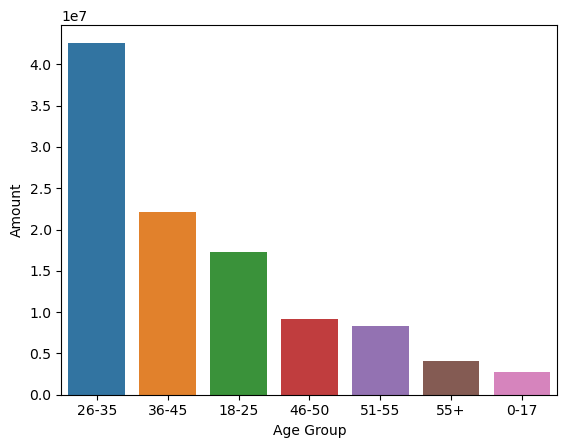

In [58]:
sales_age = df.groupby(['Age Group'], as_index = False)['Amount'].sum().sort_values(by = 'Amount' , ascending = False)
sns.barplot(data = sales_age, x = 'Age Group', y = 'Amount')

From above plot we see, maximun amount has been spent by age group 26-35 and in that females are majority buyers

<AxesSubplot:xlabel='State', ylabel='Amount'>

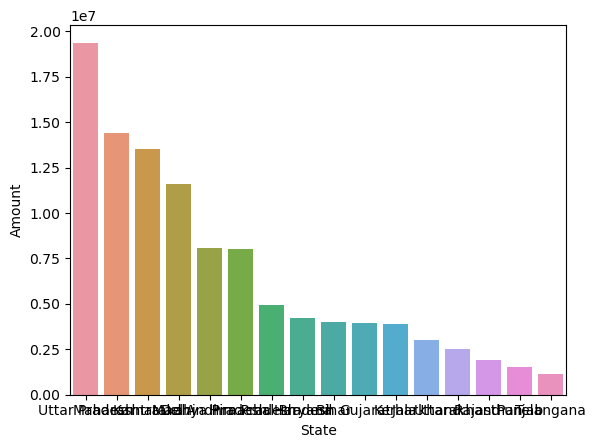

In [60]:
sales_states = df.groupby('State', as_index =  False)['Amount'].sum().sort_values(by='Amount' ,ascending  = False)
sns.barplot(data =  sales_states, x = 'State', y = 'Amount')

<AxesSubplot:xlabel='State', ylabel='Amount'>

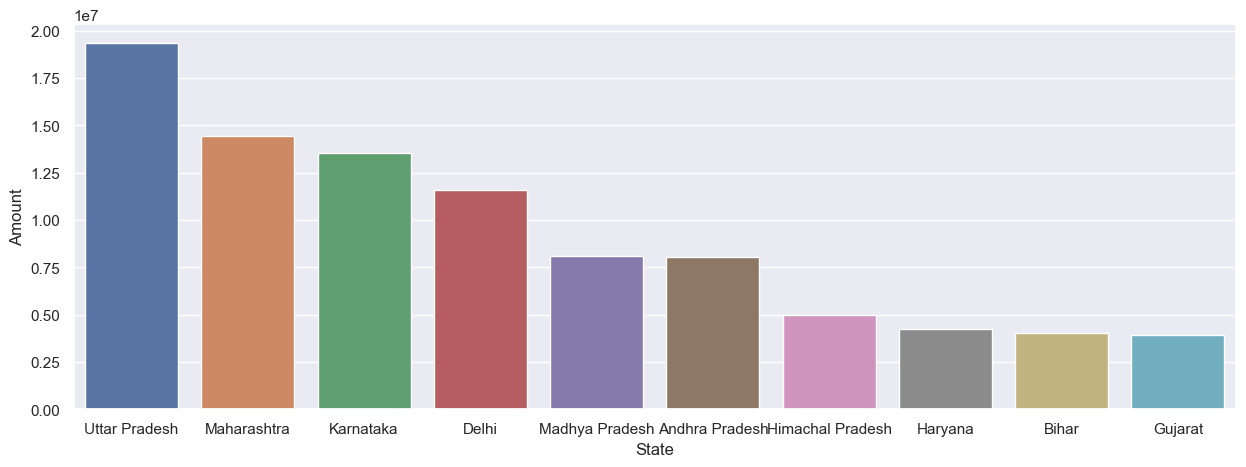

In [64]:
sns.set(rc = {'figure.figsize': (15,5)})
sales_states = df.groupby('State', as_index =  False)['Amount'].sum().sort_values(by='Amount' ,ascending  = False).head(10)
sns.barplot(data =  sales_states, x = 'State', y = 'Amount')

<AxesSubplot:xlabel='State', ylabel='Orders'>

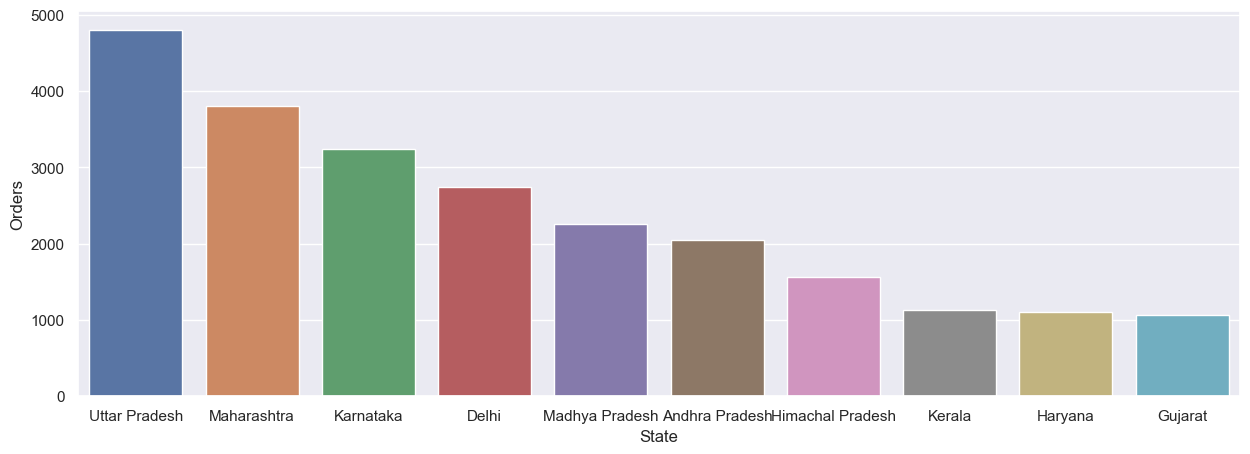

In [69]:
# Orders per states
sns.set(rc = {'figure.figsize':(15,5)})
order_states = df.groupby('State', as_index = False)['Orders'].sum().sort_values(by = 'Orders', ascending =  False).head(10)
sns.barplot(data = order_states, x = 'State', y = 'Orders')

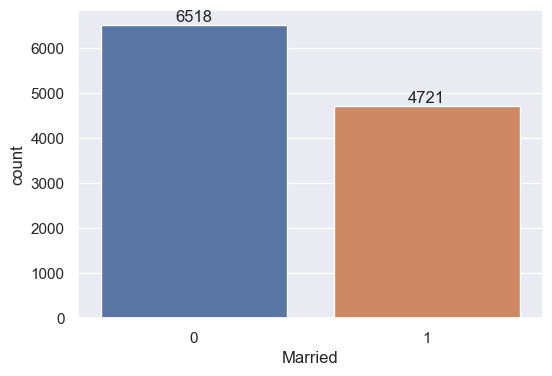

In [76]:
# Marital status
ax = sns.countplot(data = df ,x ='Married')
sns.set(rc = {'figure.figsize':(7,5)})

for bars in ax.containers:
    ax.bar_label(bars)

<AxesSubplot:xlabel='Married', ylabel='Orders'>

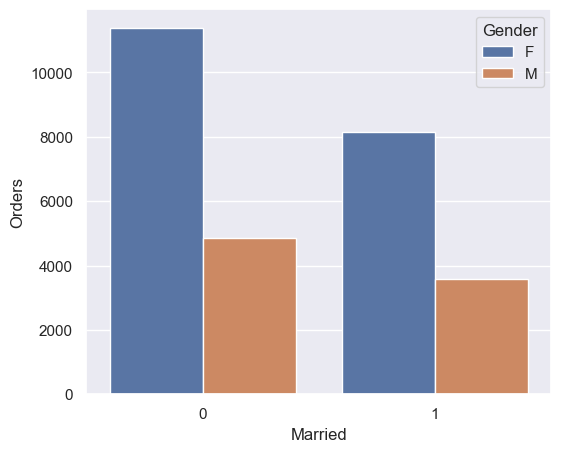

In [79]:
# Orders as per Martial status
sns.set(rc = {'figure.figsize':(6,5)})
order_marr = df.groupby(['Married','Gender'], as_index = False)['Orders'].sum().sort_values(by = 'Orders', ascending =  False).head(10)
sns.barplot(data = order_marr, x = 'Married', y = 'Orders', hue = 'Gender')

Based on above graphs we see, married women bought the most.

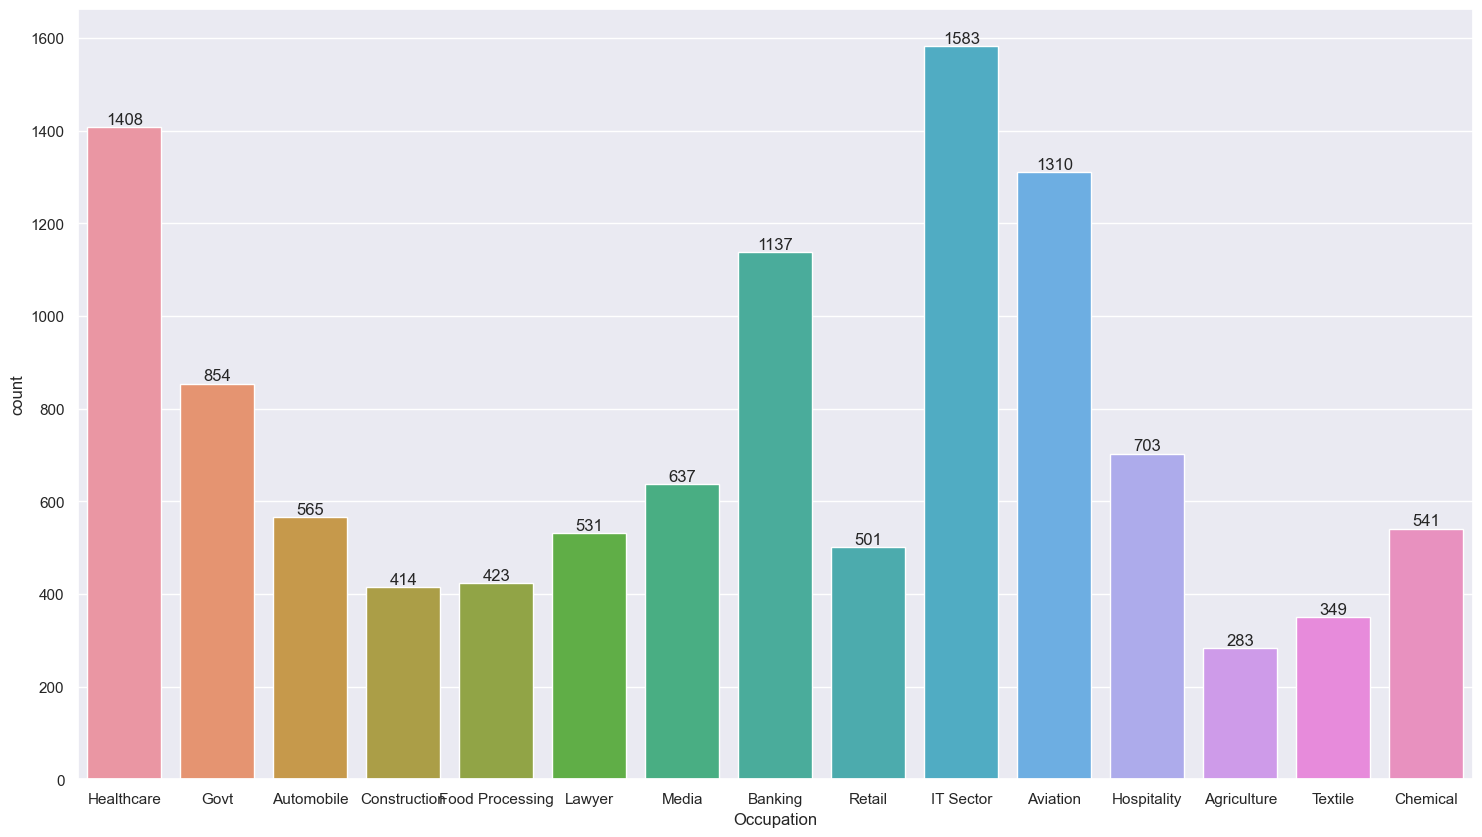

In [85]:
#Occupation
sns.set(rc = {'figure.figsize':(18,10)})
ax = sns.countplot(data = df, x ='Occupation')
for bars in ax.containers:
    ax.bar_label(bars)

<AxesSubplot:xlabel='Occupation', ylabel='Orders'>

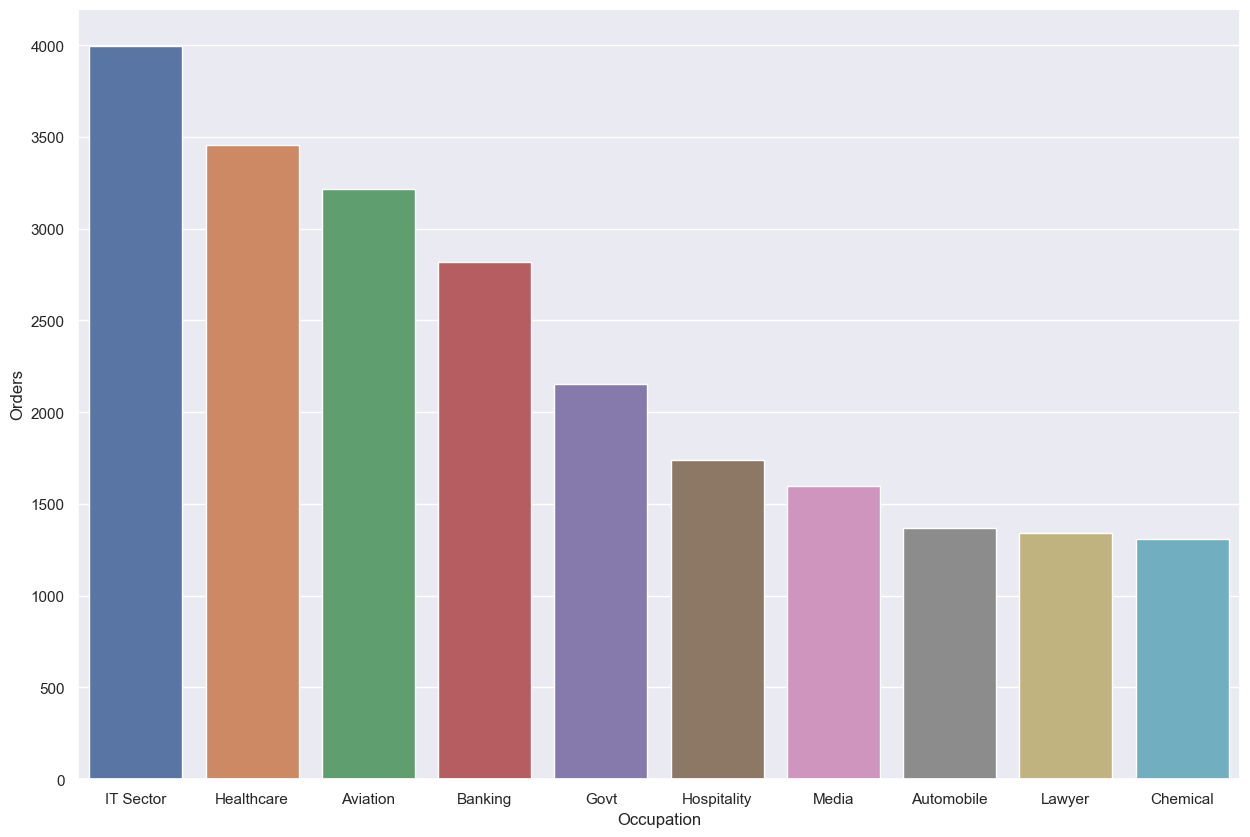

In [82]:
# Based on occupation
sns.set(rc = {'figure.figsize':(15,10)})

order_occupation = df.groupby('Occupation', as_index = False)['Orders'].sum().sort_values(by = 'Orders', ascending = False).head(10)
sns.barplot(data = order_occupation, x = 'Occupation', y = 'Orders')

We can see that majority spending is done by IT, Healthcare and Aviaton sectors.


In [86]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Married', 'State', 'Zone', 'Occupation', 'Product_Category', 'Orders',
       'Amount'],
      dtype='object')

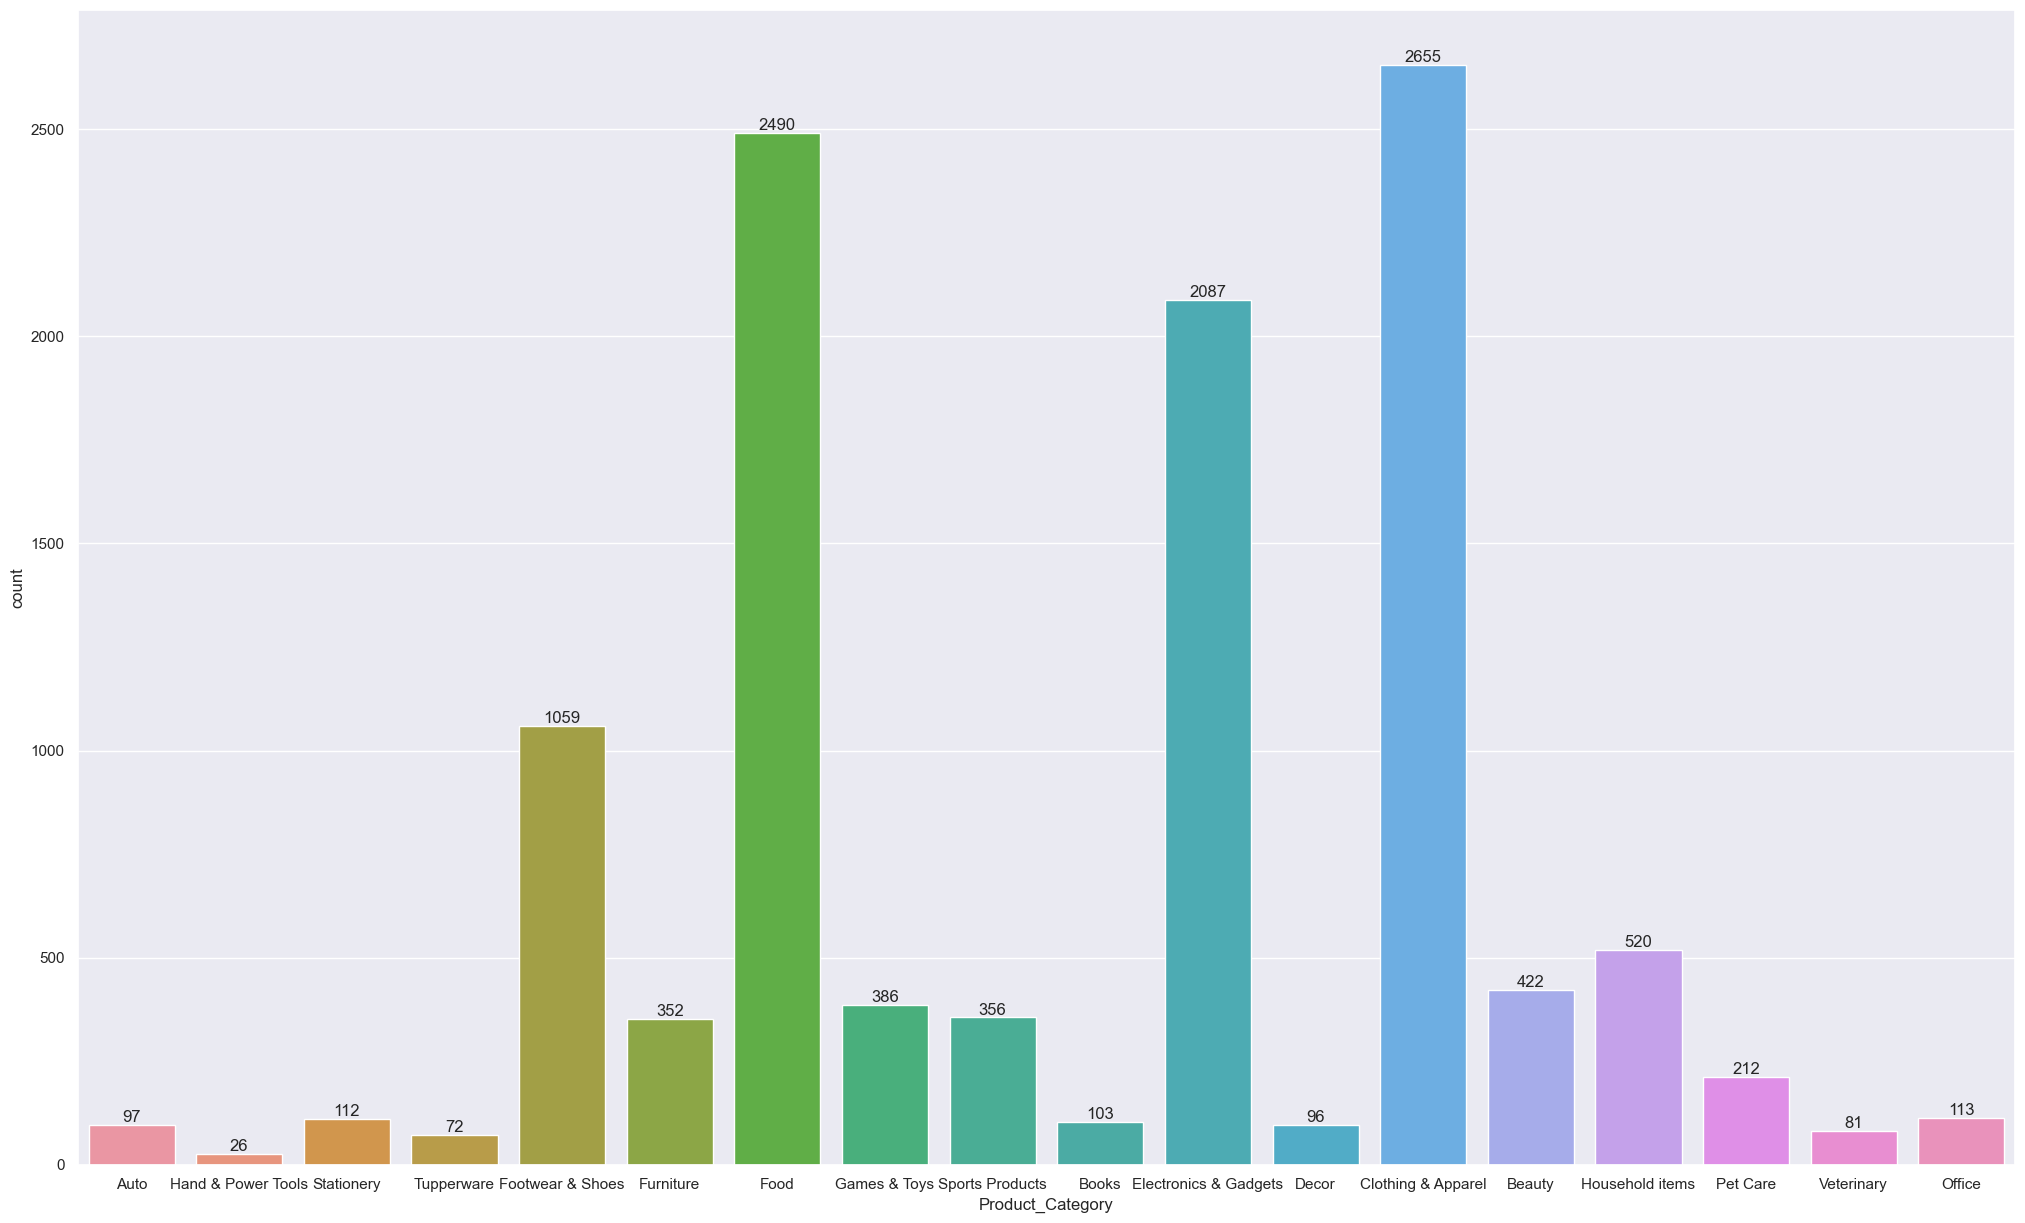

In [89]:
#Product category
sns.set(rc = {'figure.figsize':(25,15)})
ax = sns.countplot(data = df , x= 'Product_Category')

for bars in ax.containers:
    ax.bar_label(bars)

<AxesSubplot:xlabel='Product_Category', ylabel='Amount'>

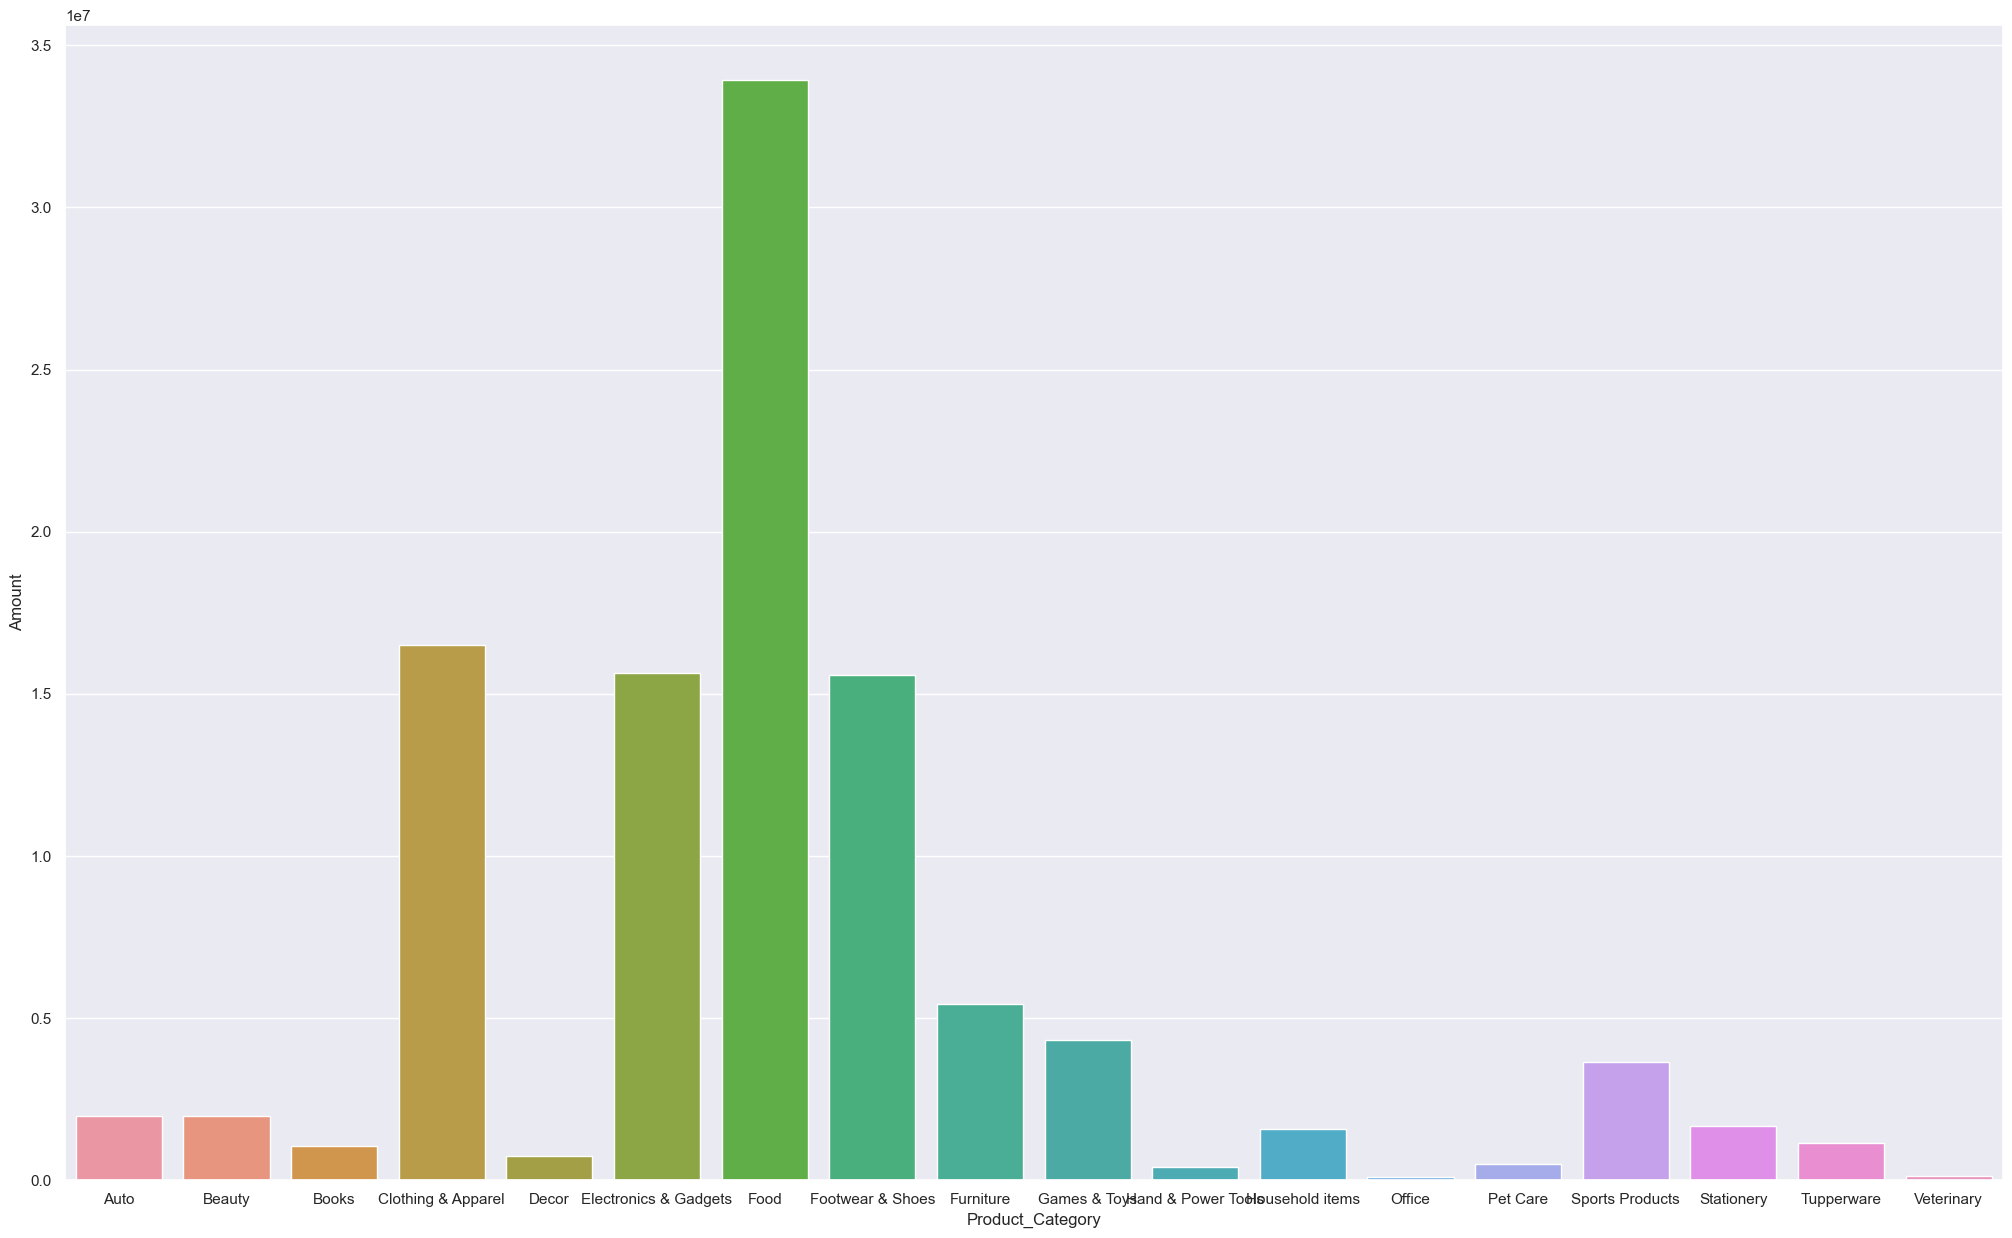

In [94]:
# amount by catgeory
amo_pro = df.groupby('Product_Category', as_index = False)['Amount'].sum()
sns.barplot(data = amo_pro, x = 'Product_Category', y = 'Amount')

<AxesSubplot:xlabel='Product_Category', ylabel='Orders'>

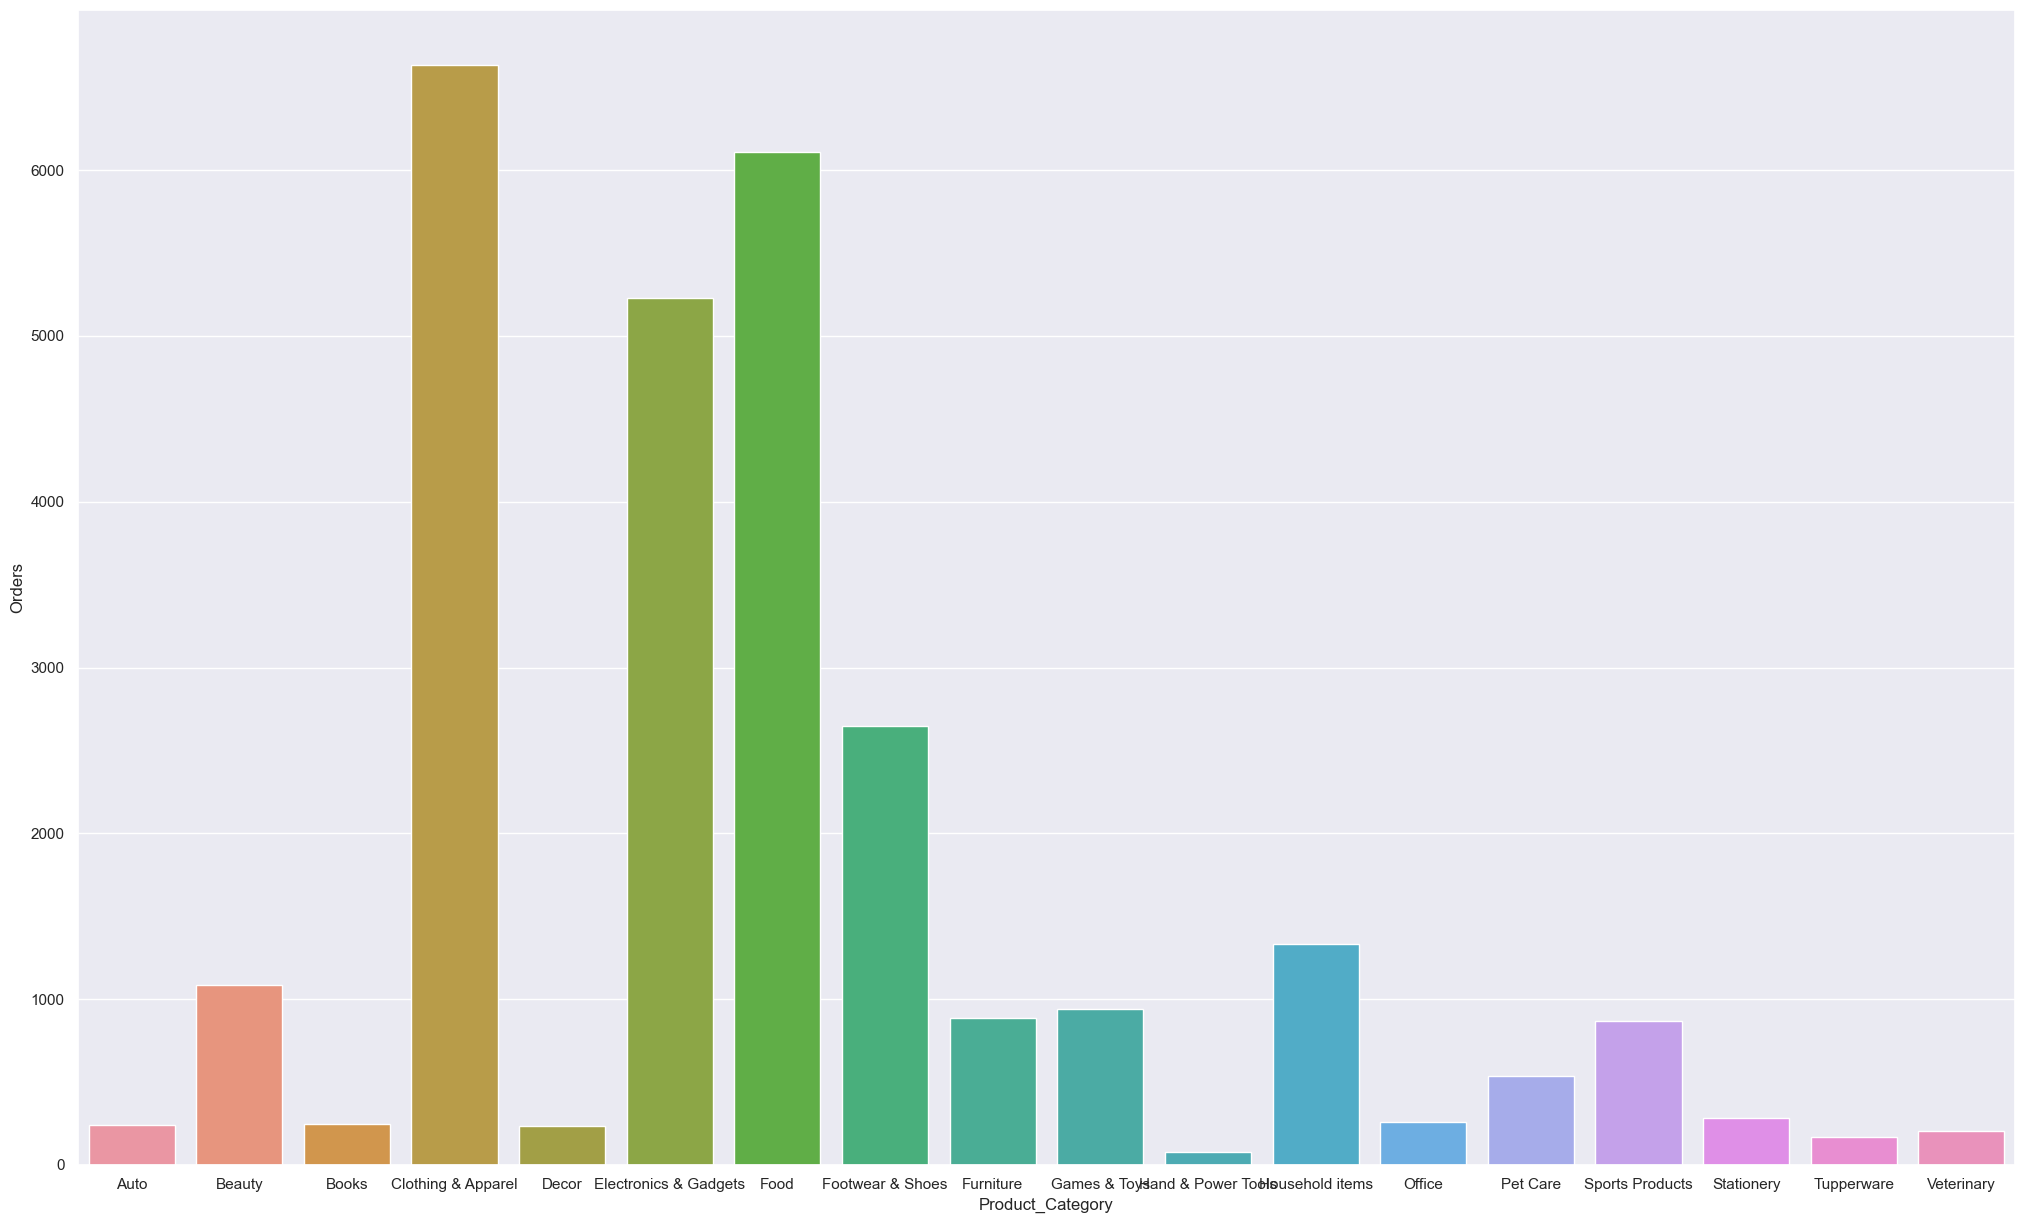

In [95]:
# Orders by category

ord_pro = df.groupby('Product_Category', as_index = False)['Orders'].sum()
sns.barplot(data = ord_pro, x = 'Product_Category', y = 'Orders')

Here we see that although max orders were from Clothing but the maximun amount was spent in Food category.